# ***Pandas et Séries Temporelles***

## ***1. Travailler avec des séries Temporelles***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
bitcoin = pd.read_csv('/content/BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-30,7405.642090,7627.824707,7184.267090,7609.142578,7609.142578,1.570245e+10
2019-10-01,7614.512695,7772.159180,7529.773438,7630.927734,7630.927734,1.399857e+10
2019-10-02,7631.783691,7657.534180,7506.678223,7657.534180,7657.534180,1.197547e+10
2019-10-03,7655.465332,7665.672363,7421.705566,7525.158203,7525.158203,1.245280e+10
2019-10-04,7524.705078,7523.010742,7423.901855,7473.723145,7473.723145,1.196702e+10


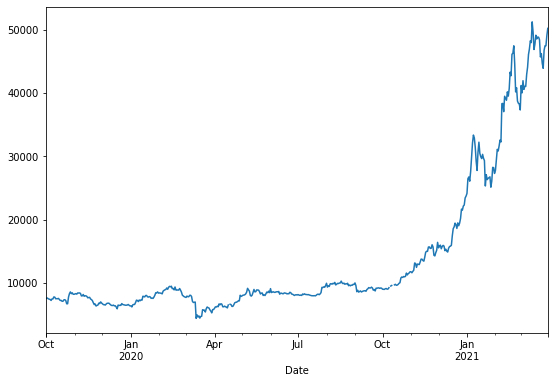

In [8]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

In [9]:
bitcoin.index

DatetimeIndex(['2019-09-30', '2019-10-01', '2019-10-02', '2019-10-03',
               '2019-10-04', '2019-10-05', '2019-10-06', '2019-10-07',
               '2019-10-08', '2019-10-09',
               ...
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq=None)

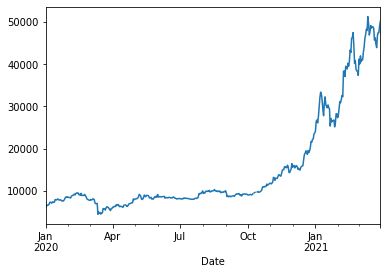

In [12]:
bitcoin.loc['2020':'2021', 'Close'].plot()

## ***2. Resample***

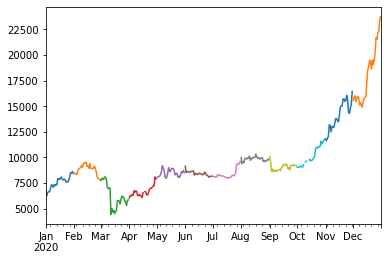

In [16]:
bitcoin.loc['2020', 'Close'].resample('M').plot()
plt.show()

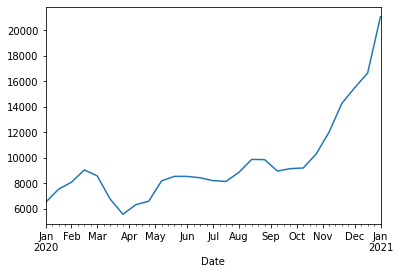

In [17]:
bitcoin.loc['2020', 'Close'].resample('2W').mean().plot()
plt.show()

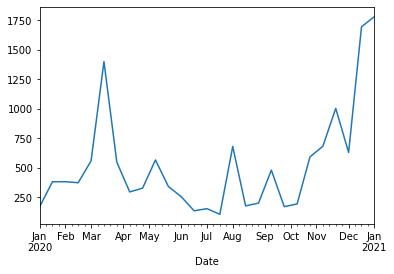

In [18]:
bitcoin.loc['2020', 'Close'].resample('2W').std().plot()
plt.show()

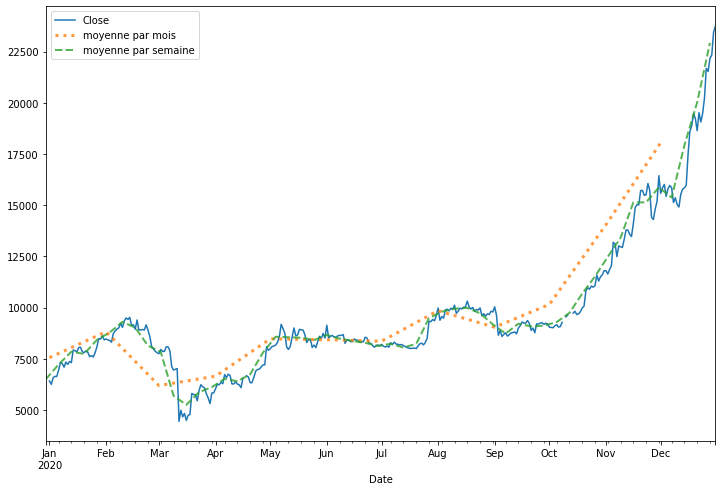

In [20]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2020', 'Close'].plot()

bitcoin.loc['2020', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3,
                                              ls = ':', alpha = 0.8)

bitcoin.loc['2020', 'Close'].resample('W').mean().plot(label='moyenne par semaine',
                                                       lw=2, ls = '--', alpha=0.8)
plt.legend()
plt.show()

## ***3. Aggregate***   

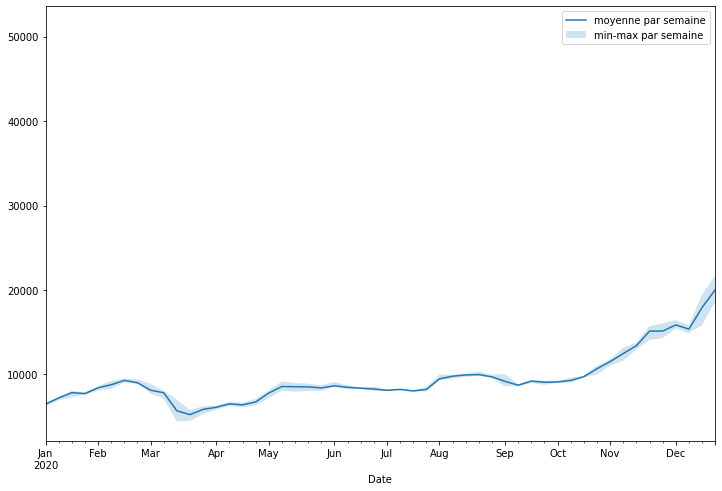

In [21]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12,8))

m['mean']['2020'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha = 0.2, label = 'min-max par semaine')

plt.legend()
plt.show()

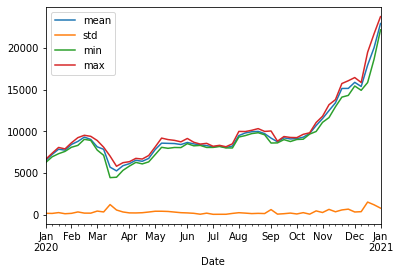

In [22]:
bitcoin.loc['2020', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()

## ***4. Moving Average et EWM***

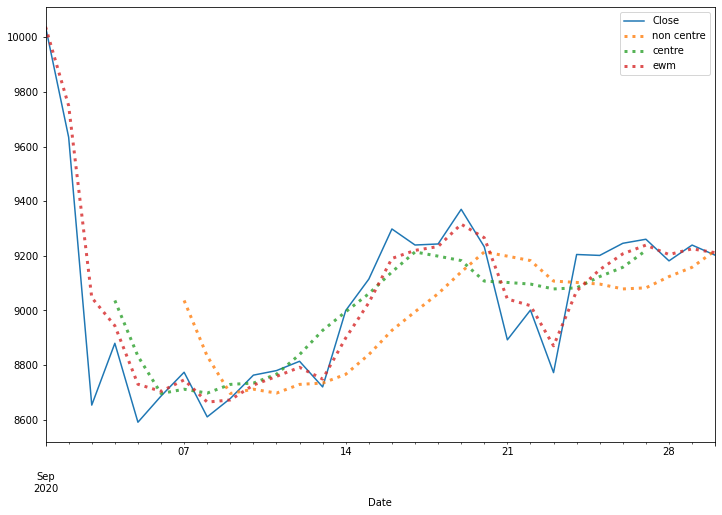

In [23]:
plt.figure(figsize=(12,8))
bitcoin.loc['2020-09', 'Close'].plot()
bitcoin.loc['2020-09', 'Close'].rolling(window=7).mean().plot(label='non centre',
                                                           lw = 3, ls = ':', alpha=0.8)
bitcoin.loc['2020-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre',
                                                                           lw = 3, ls = ':', alpha=0.8)
bitcoin.loc['2020-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

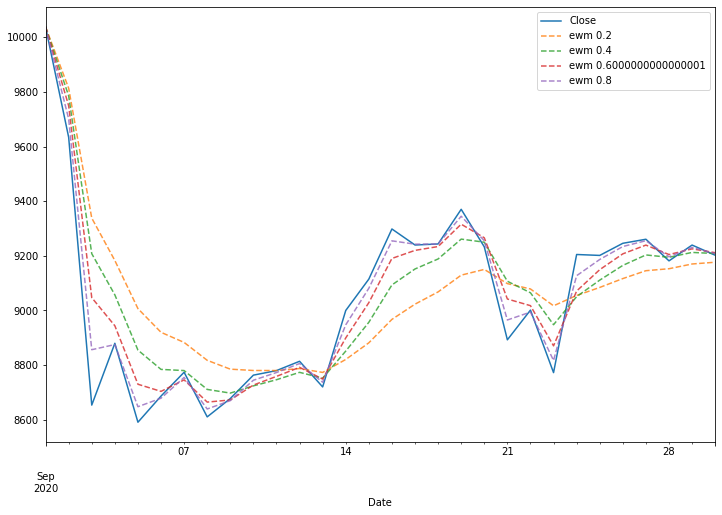

In [25]:
plt.figure(figsize=(12,8))
bitcoin.loc['2020-09', 'Close'].plot()

for i in np.arange(0.2,1,0.2):
  bitcoin.loc['2020-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', 
                                                           ls = '--', alpha = 0.8)
plt.legend()
plt.show()

## ***5. Comparaison de 2 séries Temporelles***  

In [26]:
ethereum = pd.read_csv('/content/ETH-EUR.csv', index_col='Date', parse_dates=True)


In [27]:
btc_eth = pd.merge(bitcoin, ethereum, on = 'Date', how = 'inner',
                   suffixes = ('_btc', '_eth'))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01d91648d0>,
      dtype=object)

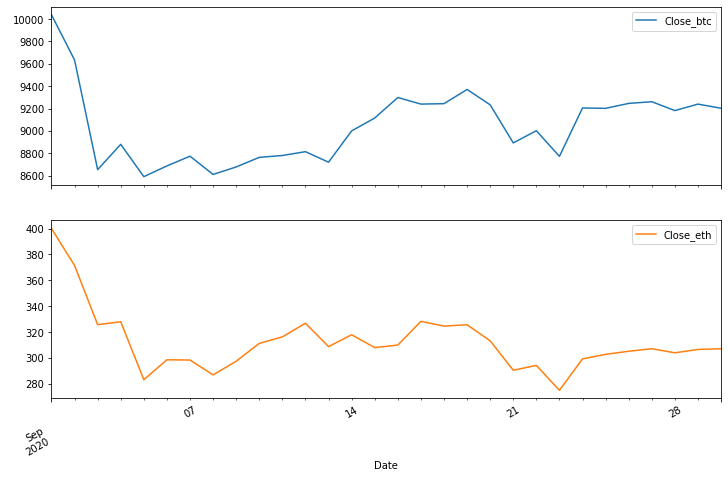

In [28]:
btc_eth[['Close_btc', 'Close_eth']]['2020-09'].plot(subplots = True, figsize=(12,8))

## ***6. Exercice et Solution***

In [29]:
data = bitcoin.copy()

data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [30]:
data['RollingMax'] = data['Close'].shift(1).rolling(window = 28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window = 28).min()

data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1




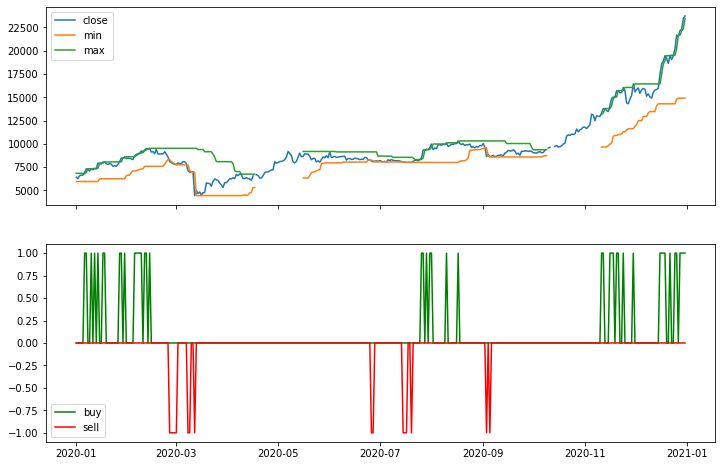

In [31]:
start = '2020'
end = '2020'
fig, ax = plt.subplots(2, figsize = (12, 8), sharex=True)

#plt.figure(figsize=(12,8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])
